In [ ]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np

# Financial Data Analysis
import yfinance as yf
#import ta
#import quantstats as qs

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson
import math

# Feature Selection
from sklearn.feature_selection import RFECV

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split,TimeSeriesSplit

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor,
    AdaBoostRegressor, RandomForestRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

# ML classifiers
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier,
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier
    )
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

#Clustering algorithm
from sklearn.cluster import KMeans

# Fine-tuning
#import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed = 123 # Defining seed
seaborn = 'seaborn' # Defining Plotly Template

In [ ]:
def dataframe_description(df):
    """
    This function prints some basic info on the dataset.
    """
    categorical_features = []
    continuous_features = []
    binary_features = []

    for col in df.columns:
        if df[col].dtype == object:
            categorical_features.append(col)
        else:
            if df[col].nunique() <= 2:
                binary_features.append(col)
            else:
                continuous_features.append(col)

    print("\n{} shape: {}".format(type(df).__name__, df.shape))
    print("\n{:,.0f} samples".format(df.shape[0]))
    print("\n{:,.0f} attributes".format(df.shape[1]))
    print(f'\nMissing Data: \n')
    print(df.isnull().sum())
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData types: \n')
    print(df.dtypes)
    print(f'\nCategorical features: \n')
    if len(categorical_features) == 0:
        print('No Categorical Features')
    else:
        for feature in categorical_features:
            print(feature)
    print(f'\nContinuous features: \n')
    if len(continuous_features) == 0:
        print('No Continuous Features')
    else:
        for feature in continuous_features:
            print(feature)
    print(f'\nBinary features: \n')
    if len(binary_features) == 0:
        print('No Binary Features')
    else:
        for feature in binary_features:
            print(feature)
    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [ ]:
def pie_plot(df, feat):

    '''
    This function plots a pie plot.
    '''

    # Plotting pie plot
    fig = px.pie(df, names = df[feat].values, hole = .75)
    fig.update_traces(pull = [0.05] * len(df))
    fig.update_traces(marker=dict(colors=['navy', 'magenta']))

    # Layout
    fig.update_layout(title = {'text':f'&nbsp;&nbsp;<b>Distribution of Classes<br><sup>&nbsp;&nbsp;&nbsp;&nbsp;<i>{feat}</i></sup></b>',
                                'x': 0, 'xanchor': 'left'},
                    margin=dict(t=100, r = 0),
                    template = seaborn,
                    showlegend = True,
                    height = 550, width = 950,
                    paper_bgcolor = '#F6F5F5'
                    )
    fig.show()

In [ ]:
def split_train_test(df, test_size, seed):

    '''
    This function splits a dataframe for training and testing according to test_size
    '''

    train, test = train_test_split(df, test_size = test_size, shuffle = True, random_state = seed) # Splitting data

    print(f'\n Train shape: {train.shape}\n')
    print(f'\n {len(train):,.0f} Samples \n')
    print(f'\n {len(train.columns)} Attributes \n')
    display(train.head(10))
    print('\n' * 2)

    print(f'\n Test shape: {test.shape:}\n')
    print(f'\n {len(test):,.0f} Samples \n')
    print(f'\n {len(test.columns)} Attributes \n')
    display(test.head(10))

    return train, test

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dev_data_to_be_shared.csv')

In [ ]:
df['account_opening_date'] = pd.to_datetime(df['account_opening_date'],
 format = '%d-%m-%Y',
 errors = 'coerce')

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'account_opening_date' is in datetime format
df['account_opening_date'] = pd.to_datetime(df['account_opening_date'])

# Extract month and year from the date column
df['month'] = df['account_opening_date'].dt.month
df['year'] = df['account_opening_date'].dt.year

# Create a new column 'month_year' by concatenating 'year' and 'month'
df['month_year'] = df[['year', 'month']].astype(str).agg('-'.join, axis=1)

# Drop 'month' and 'year' columns
df.drop(['month', 'year'], axis=1, inplace=True)

# Group by month_year, 'Target', and count occurrences
counts_by_month_year_and_target = df.groupby(['month_year', 'Target']).size().reset_index(name='counts')

# Pivot the DataFrame for better plotting
pivot_df = counts_by_month_year_and_target.pivot_table(index='month_year', columns='Target', values='counts', fill_value=0).reset_index()

# Melt the DataFrame to have a single column for the 'Target'
melted_df = pd.melt(pivot_df, id_vars='month_year', var_name='Target', value_name='Count')

# Plotting using Plotly Express
fig = px.bar(melted_df, x='month_year', y='Count', color='Target',
             labels={'Count': 'Count of Targets'},
             title='Counts of 0s and 1s by Month and Year',
             barmode='stack')

fig.update_layout(xaxis_title='Month and Year', yaxis_title='Count')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'account_opening_date' is in datetime format
df['account_opening_date'] = pd.to_datetime(df['account_opening_date'])

# Extract day of the week from the date column
df['day_of_week'] = df['account_opening_date'].dt.day_name()

# Group by day of the week and count occurrences of 0 and 1 in 'Target'
counts_by_day_and_target = df.groupby(['day_of_week', 'Target']).size().reset_index(name='counts')

# Pivot the DataFrame for better plotting
pivot_df = counts_by_day_and_target.pivot(index='day_of_week', columns='Target', values='counts').fillna(0)

# Plotting using Plotly Express
fig = px.bar(pivot_df, x=pivot_df.index, y=[0, 1],
             labels={'0': 'Count of 0s', '1': 'Count of 1s'},
             title='Counts of 0s and 1s by Day of the Week',
             barmode='stack')

fig.update_layout(xaxis_title='Day of the Week', yaxis_title='Count')
fig.show()


In [ ]:
df.shape

(100000, 180)

In [ ]:
dataframe_description(df)


DataFrame shape: (100000, 180)

100,000 samples

180 attributes

Missing Data: 

Primary key                 0
Target                      0
account_opening_date        0
country_code             3666
demog_1                  3669
                        ...  
others_45               99306
demog_42                    0
demog_43                 3705
month_year                  0
day_of_week                 0
Length: 180, dtype: int64

Duplicates: 0

Data types: 

Primary key                      int64
Target                           int64
account_opening_date    datetime64[ns]
country_code                    object
demog_1                        float64
                             ...      
others_45                      float64
demog_42                         int64
demog_43                        object
month_year                      object
day_of_week                     object
Length: 180, dtype: object

Categorical features: 

country_code
demog_2
income
city_tier
occupation
de

Primary key  Target account_opening_date country_code  demog_1 demog_2  \
0            1       0           2023-02-18           IN     53.0     3.0   
1            2       0           2023-02-01           IN     55.0     1.0   
2            3       0           2022-12-09           IN     55.0     3.0   
3            4       0           2023-03-31           IN     53.0     3.0   
4            5       0           2023-01-17           IN     55.0     6.0   

         income  demog_3 city_tier     occupation  ... demog_40  demog_41  \
0  100001 to 5L    101.0     Rural  Self_Employed  ...      low         1   
1       0 to 1L    101.0    Tier 1       Salaried  ...     High         1   
2       0 to 1L    101.0    Tier 2  Self_Employed  ...   medium         1   
3  100001 to 5L    101.0    Tier 7  Self_Employed  ...     High         1   
4       0 to 1L    101.0    Tier 1        Student  ...      low         1   

   others_42  others_43  others_44 others_45 demog_42  demog_43 month_year  \
0        NaN        0.0        NaN       NaN        1    medium     2023-2   
1        NaN        NaN        NaN       NaN        1      High     2023-2   
2        NaN        NaN        NaN       NaN        1      High    2022-12   
3        NaN        NaN        NaN       NaN        1      High     2023-3   
4        NaN        NaN        NaN       NaN        1    medium     2023-1   

  day_of_week  
0    Saturday  
1   Wednesday  
2      Friday  
3      Friday  
4     Tuesday  

[5 rows x 180 columns]


DataFrame Tail: 



Primary key  Target account_opening_date country_code  demog_1 demog_2  \
99995        99996       1           2022-12-21           IN     55.0       2   
99996        99997       1           2023-03-17           IN     55.0       6   
99997        99998       1           2022-12-08           IN     55.0       1   
99998        99999       1           2023-03-03           IN     55.0       1   
99999       100000       1           2023-02-03           IN    401.0       2   

             income  demog_3 city_tier     occupation  ... demog_40  demog_41  \
99995       0 to 1L    101.0     Rural  Self_Employed  ...     High         1   
99996  100001 to 5L    101.0     Rural        Student  ...      low         1   
99997  100001 to 5L    101.0    Tier 6       Salaried  ...     High         1   
99998     5L to 10L    101.0    Tier 1          Other  ...     High         1   
99999     5L to 10L    101.0    Tier 7  Self_Employed  ...   medium         1   

       others_42  others_43  others_44 others_45 demog_42  demog_43  \
99995        NaN        NaN        NaN       NaN        1      High   
99996        NaN        NaN        NaN       NaN        1    medium   
99997        NaN        NaN        NaN       NaN        1    medium   
99998        NaN        NaN        NaN       NaN        1      High   
99999        NaN        NaN        NaN       NaN        1    medium   

      month_year day_of_week  
99995    2022-12   Wednesday  
99996     2023-3      Friday  
99997    2022-12    Thursday  
99998     2023-3      Friday  
99999     2023-2      Friday  

[5 rows x 180 columns]

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'Target' is the name of your target variable
target_variable = 'Target'
threshold_nulls = 0.8*len(df)

# List to store columns to be dropped
columns_to_drop = []

# Iterate over all columns in the DataFrame
for column_to_plot in df.columns:
    # Check if the column has more than 1,20,000 null values
    if df[column_to_plot].isnull().sum() > threshold_nulls:
        # Add the column to the list for dropping
        columns_to_drop.append(column_to_plot)

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

print(df)


       Primary key  Target account_opening_date country_code  demog_1 demog_2  \
0                1       0           2023-02-18           IN     53.0     3.0   
1                2       0           2023-02-01           IN     55.0     1.0   
2                3       0           2022-12-09           IN     55.0     3.0   
3                4       0           2023-03-31           IN     53.0     3.0   
4                5       0           2023-01-17           IN     55.0     6.0   
...            ...     ...                  ...          ...      ...     ...   
99995        99996       1           2022-12-21           IN     55.0       2   
99996        99997       1           2023-03-17           IN     55.0       6   
99997        99998       1           2022-12-08           IN     55.0       1   
99998        99999       1           2023-03-03           IN     55.0       1   
99999       100000       1           2023-02-03           IN    401.0       2   

             income  demog_

In [ ]:
columns_to_drop

['others_42', 'others_43', 'others_44', 'others_45']

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Set the frequency threshold to 0.1% of the dataset length
threshold_frequency = 0.1 / 100 * len(df)

for col in categorical_columns:
    # Calculate value counts for each category
    value_counts = df[col].value_counts()

    # Identify infrequent values
    infrequent_values = value_counts[value_counts < threshold_frequency].index

    # Replace infrequent values with a common label (e.g., 'Other')
    df[col] = df[col].apply(lambda x: 'Other' if x in infrequent_values else x)

print(df)


       Primary key  Target account_opening_date country_code  demog_1 demog_2  \
0                1       0           2023-02-18           IN     53.0     3.0   
1                2       0           2023-02-01           IN     55.0     1.0   
2                3       0           2022-12-09           IN     55.0     3.0   
3                4       0           2023-03-31           IN     53.0     3.0   
4                5       0           2023-01-17           IN     55.0     6.0   
...            ...     ...                  ...          ...      ...     ...   
99995        99996       1           2022-12-21           IN     55.0       2   
99996        99997       1           2023-03-17           IN     55.0       6   
99997        99998       1           2022-12-08           IN     55.0       1   
99998        99999       1           2023-03-03           IN     55.0       1   
99999       100000       1           2023-02-03           IN    401.0       2   

             income  demog_

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Impute missing values with the mode for all categorical columns
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


In [ ]:
'''
lower_percentile = 10
upper_percentile = 90

for col in df.select_dtypes(include=[np.number]).columns:
    lower_bound = np.percentile(df[col], lower_percentile)
    upper_bound = np.percentile(df[col], upper_percentile)

    # Replace outliers with 10th and 90th percentile values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nDataFrame with replaced outliers:")
print(df)
'''

'\nlower_percentile = 10\nupper_percentile = 90\n\nfor col in df.select_dtypes(include=[np.number]).columns:\n    lower_bound = np.percentile(df[col], lower_percentile)\n    upper_bound = np.percentile(df[col], upper_percentile)\n\n    # Replace outliers with 10th and 90th percentile values\n    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])\n    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])\n\nprint("\nDataFrame with replaced outliers:")\nprint(df)\n'

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/validation_data_to_be_shared.csv')

In [ ]:
primary=df2['Primary key']

In [ ]:
df2['account_opening_date'] = pd.to_datetime(df2['account_opening_date'],
 format = '%d-%m-%Y',
 errors = 'coerce')

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'account_opening_date' is in datetime format
df2['account_opening_date'] = pd.to_datetime(df2['account_opening_date'])

# Extract month and year from the date column
df2['month'] = df2['account_opening_date'].dt.month
df2['year'] = df2['account_opening_date'].dt.year

# Create a new column 'month_year' by concatenating 'year' and 'month'
df2['month_year'] = df2[['year', 'month']].astype(str).agg('-'.join, axis=1)

# Drop 'month' and 'year' columns
df2.drop(['month', 'year'], axis=1, inplace=True)

# Group by month_year, 'Target', and count occurrences
#counts_by_month_year_and_target = df2.groupby(['month_year', 'Target']).size().reset_index(name='counts')

# Pivot the DataFrame for better plotting
#pivot_df = counts_by_month_year_and_target.pivot_table(index='month_year', columns='Target', values='counts', fill_value=0).reset_index()

# Melt the DataFrame to have a single column for the 'Target'
#melted_df = pd.melt(pivot_df, id_vars='month_year', var_name='Target', value_name='Count')

# Plotting using Plotly Express
#fig = px.bar(melted_df, x='month_year', y='Count', color='Target',
   #          labels={'Count': 'Count of Targets'},
   #          title='Counts of 0s and 1s by Month and Year',
   #          barmode='stack')




In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'account_opening_date' is in datetime format
df2['account_opening_date'] = pd.to_datetime(df2['account_opening_date'])

# Extract day of the week from the date column
df2['day_of_week'] = df2['account_opening_date'].dt.day_name()


In [ ]:
dataframe_description(df2)


DataFrame shape: (50000, 179)

50,000 samples

179 attributes

Missing Data: 

Primary key                 0
account_opening_date        0
country_code             1863
demog_1                  1864
demog_2                  1863
                        ...  
others_45               49673
demog_42                    0
demog_43                 1888
month_year                  0
day_of_week                 0
Length: 179, dtype: int64

Duplicates: 0

Data types: 

Primary key                      int64
account_opening_date    datetime64[ns]
country_code                    object
demog_1                        float64
demog_2                         object
                             ...      
others_45                      float64
demog_42                         int64
demog_43                        object
month_year                      object
day_of_week                     object
Length: 179, dtype: object

Categorical features: 

country_code
demog_2
income
city_tier
occupation
demo

Primary key account_opening_date country_code  demog_1 demog_2  \
0      9000001           2023-03-25           IN     56.0     2.0   
1      9000002           2023-01-15           IN     55.0     1.0   
2      9000003           2023-01-06           IN     55.0     1.0   
3      9000004           2023-02-08           IN     55.0     1.0   
4      9000005           2023-01-27           IN     55.0     1.0   

         income  demog_3 city_tier     occupation demog_4  ...  demog_40  \
0     5L to 10L    101.0    Tier 7  Self_Employed       N  ...      High   
1  100001 to 5L    101.0    Tier 5       Salaried       N  ...       low   
2  100001 to 5L    101.0    Tier 1          Other       N  ...       low   
3  100001 to 5L    101.0    Tier 1          Other       N  ...    medium   
4  100001 to 5L    101.0    Tier 5          Other       N  ...       low   

   demog_41  others_42  others_43 others_44 others_45  demog_42 demog_43  \
0         1        NaN        NaN       NaN       NaN         1     High   
1         1        NaN        NaN       NaN       NaN         1   medium   
2         1        NaN        NaN       NaN       NaN         1   medium   
3         1        NaN        0.0       NaN       NaN         1     High   
4         1        NaN        NaN       NaN       NaN         1     High   

  month_year day_of_week  
0     2023-3    Saturday  
1     2023-1      Sunday  
2     2023-1      Friday  
3     2023-2   Wednesday  
4     2023-1      Friday  

[5 rows x 179 columns]


DataFrame Tail: 



Primary key account_opening_date country_code  demog_1 demog_2  \
49995      9049996           2023-02-01           IN    401.0     2.0   
49996      9049997           2023-01-18           IN     53.0     3.0   
49997      9049998           2023-02-07           IN     53.0     3.0   
49998      9049999           2023-01-06           IN    401.0     6.0   
49999      9050000           2022-12-11           IN     53.0     3.0   

             income  demog_3 city_tier     occupation demog_4  ...  demog_40  \
49995  100001 to 5L    101.0    Tier 6  Self_Employed       N  ...      High   
49996  100001 to 5L    101.0    Tier 2  Self_Employed       N  ...      High   
49997     5L to 10L    101.0     Rural  Self_Employed       N  ...       low   
49998  100001 to 5L    101.0    Tier 5        Student       N  ...      High   
49999  100001 to 5L    101.0    Tier 6  Self_Employed       N  ...      High   

       demog_41  others_42  others_43 others_44 others_45  demog_42 demog_43  \
49995         1        NaN        NaN       NaN       NaN         1     High   
49996         1        NaN        NaN       NaN       NaN         1     High   
49997         1        NaN        NaN       NaN       NaN         1     High   
49998         1        NaN        NaN       NaN       NaN         1   medium   
49999         1        NaN        NaN       NaN       NaN         1     High   

      month_year day_of_week  
49995     2023-2   Wednesday  
49996     2023-1   Wednesday  
49997     2023-2     Tuesday  
49998     2023-1      Friday  
49999    2022-12      Sunday  

[5 rows x 179 columns]

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'Target' is the name of your target variable
target_variable = 'Target'
threshold_nulls = 0.8*len(df2)

# List to store columns to be dropped
columns_to_drop = []

# Iterate over all columns in the DataFrame
for column_to_plot in df2.columns:
    # Check if the column has more than 1,20,000 null values
    if df2[column_to_plot].isnull().sum() > threshold_nulls:
        # Add the column to the list for dropping
        columns_to_drop.append(column_to_plot)

# Drop the columns from the DataFrame
df2.drop(columns=columns_to_drop, inplace=True)

print(df2)


       Primary key account_opening_date country_code  demog_1 demog_2  \
0          9000001           2023-03-25           IN     56.0     2.0   
1          9000002           2023-01-15           IN     55.0     1.0   
2          9000003           2023-01-06           IN     55.0     1.0   
3          9000004           2023-02-08           IN     55.0     1.0   
4          9000005           2023-01-27           IN     55.0     1.0   
...            ...                  ...          ...      ...     ...   
49995      9049996           2023-02-01           IN    401.0     2.0   
49996      9049997           2023-01-18           IN     53.0     3.0   
49997      9049998           2023-02-07           IN     53.0     3.0   
49998      9049999           2023-01-06           IN    401.0     6.0   
49999      9050000           2022-12-11           IN     53.0     3.0   

             income  demog_3 city_tier     occupation demog_4  ...  txn_80  \
0         5L to 10L    101.0    Tier 7  Self_

In [ ]:
columns_to_drop

['others_42', 'others_43', 'others_44', 'others_45']

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Find categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns

# Set the frequency threshold to 0.1% of the dataset length
threshold_frequency = 0.1 / 100 * len(df2)

for col in categorical_columns:
    # Calculate value counts for each category
    value_counts = df2[col].value_counts()

    # Identify infrequent values
    infrequent_values = value_counts[value_counts < threshold_frequency].index

    # Replace infrequent values with a common label (e.g., 'Other')
    df2[col] = df2[col].apply(lambda x: 'Other' if x in infrequent_values else x)

print(df2)


       Primary key account_opening_date country_code  demog_1 demog_2  \
0          9000001           2023-03-25           IN     56.0     2.0   
1          9000002           2023-01-15           IN     55.0     1.0   
2          9000003           2023-01-06           IN     55.0     1.0   
3          9000004           2023-02-08           IN     55.0     1.0   
4          9000005           2023-01-27           IN     55.0     1.0   
...            ...                  ...          ...      ...     ...   
49995      9049996           2023-02-01           IN    401.0     2.0   
49996      9049997           2023-01-18           IN     53.0     3.0   
49997      9049998           2023-02-07           IN     53.0     3.0   
49998      9049999           2023-01-06           IN    401.0     6.0   
49999      9050000           2022-12-11           IN     53.0     3.0   

             income  demog_3 city_tier     occupation demog_4  ...  txn_80  \
0         5L to 10L    101.0    Tier 7  Self_

In [ ]:
# Identify categorical columns
categorical_columns = df2.select_dtypes(include='object').columns

# Impute missing values with the mode for all categorical columns
for column in categorical_columns:
    mode_value = df2[column].mode()[0]
    df2[column].fillna(mode_value, inplace=True)

In [ ]:
df.drop('Primary key',axis=1,inplace=True)
y=df['Target']
df.drop('Target',axis=1,inplace=True)
df.drop('account_opening_date',axis=1,inplace=True)
df2.drop('account_opening_date',axis=1,inplace=True)
df2.drop('Primary key',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, df2], ignore_index=True)

In [ ]:
df

country_code  demog_1 demog_2        income  demog_3 city_tier  \
0                IN     53.0     3.0  100001 to 5L    101.0     Rural   
1                IN     55.0     1.0       0 to 1L    101.0    Tier 1   
2                IN     55.0     3.0       0 to 1L    101.0    Tier 2   
3                IN     53.0     3.0  100001 to 5L    101.0    Tier 7   
4                IN     55.0     6.0       0 to 1L    101.0    Tier 1   
...             ...      ...     ...           ...      ...       ...   
149995           IN    401.0     2.0  100001 to 5L    101.0    Tier 6   
149996           IN     53.0     3.0  100001 to 5L    101.0    Tier 2   
149997           IN     53.0     3.0     5L to 10L    101.0     Rural   
149998           IN    401.0     6.0  100001 to 5L    101.0    Tier 5   
149999           IN     53.0     3.0  100001 to 5L    101.0    Tier 6   

           occupation demog_4  demog_5  demog_6  ...  txn_80  txn_81  \
0       Self_Employed       N      3.0      1.0  ...     1.0     1.0   
1            Salaried       N      2.0      1.0  ...    12.0    28.0   
2       Self_Employed       N      4.0      1.0  ...     5.0    48.0   
3       Self_Employed       N      4.0      1.0  ...     1.0    10.0   
4             Student       N      4.0      1.0  ...     NaN     NaN   
...               ...     ...      ...      ...  ...     ...     ...   
149995  Self_Employed       N      2.0      1.0  ...    24.0     2.0   
149996  Self_Employed       N      4.0      1.0  ...    11.0    20.0   
149997  Self_Employed       N      4.0      1.0  ...    28.0    18.0   
149998        Student       N      2.0      1.0  ...  2874.0     7.0   
149999  Self_Employed       N      4.0      1.0  ...     6.0     9.0   

        demog_39 email_domain  demog_40  demog_41  demog_42  demog_43  \
0              1        gmail       low         1         1    medium   
1              1        gmail      High         1         1      High   
2              1        gmail    medium         1         1      High   
3              1        gmail      High         1         1      High   
4              1        gmail       low         1         1    medium   
...          ...          ...       ...       ...       ...       ...   
149995         1       Others      High         1         1      High   
149996         1        gmail      High         1         1      High   
149997         1        gmail       low         1         1      High   
149998         1        gmail      High         1         1    medium   
149999         1        gmail      High         1         1      High   

        month_year  day_of_week  
0           2023-2     Saturday  
1           2023-2    Wednesday  
2          2022-12       Friday  
3           2023-3       Friday  
4           2023-1      Tuesday  
...            ...          ...  
149995      2023-2    Wednesday  
149996      2023-1    Wednesday  
149997      2023-2      Tuesday  
149998      2023-1       Friday  
149999     2022-12       Sunday  

[150000 rows x 173 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming train is your DataFrame with categorical columns

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to strings
df[categorical_columns] = df[categorical_columns].astype(str)

# Use one-hot encoding for categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' removes one column to avoid multicollinearity
encoded_columns = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
df = df.drop(columns=categorical_columns)

# Concatenate the one-hot encoded columns to the DataFrame
df = pd.concat([df, encoded_columns], axis=1)

# Now train contains numerical values suitable for running a model


In [ ]:
df

demog_1  demog_3  demog_5  demog_6  demog_7  demog_8  demog_9  \
0          53.0    101.0      3.0      1.0      1.0     41.0    False   
1          55.0    101.0      2.0      1.0      1.0     41.0     True   
2          55.0    101.0      4.0      1.0      1.0     41.0    False   
3          53.0    101.0      4.0      1.0      1.0     41.0    False   
4          55.0    101.0      4.0      1.0      1.0     41.0    False   
...         ...      ...      ...      ...      ...      ...      ...   
149995    401.0    101.0      2.0      1.0      1.0     41.0    False   
149996     53.0    101.0      4.0      1.0      1.0     41.0    False   
149997     53.0    101.0      4.0      1.0      1.0     41.0    False   
149998    401.0    101.0      2.0      1.0      1.0     41.0    False   
149999     53.0    101.0      4.0      1.0      1.0     41.0    False   

        demog_11  demog_12  demog_13  ...  demog_43_medium  month_year_2023-1  \
0            0.0     False      True  ...              1.0                0.0   
1            0.0     False      True  ...              0.0                0.0   
2            0.0     False      True  ...              0.0                0.0   
3            0.0     False      True  ...              0.0                0.0   
4            0.0     False      True  ...              1.0                1.0   
...          ...       ...       ...  ...              ...                ...   
149995       0.0     False     False  ...              0.0                0.0   
149996       0.0     False      True  ...              0.0                1.0   
149997       0.0     False      True  ...              0.0                0.0   
149998       0.0     False      True  ...              1.0                1.0   
149999       0.0     False      True  ...              0.0                0.0   

        month_year_2023-2  month_year_2023-3  day_of_week_Monday  \
0                     1.0                0.0                 0.0   
1                     1.0                0.0                 0.0   
2                     0.0                0.0                 0.0   
3                     0.0                1.0                 0.0   
4                     0.0                0.0                 0.0   
...                   ...                ...                 ...   
149995                1.0                0.0                 0.0   
149996                0.0                0.0                 0.0   
149997                1.0                0.0                 0.0   
149998                0.0                0.0                 0.0   
149999                0.0                0.0                 0.0   

        day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                        1.0                 0.0                   0.0   
1                        0.0                 0.0                   0.0   
2                        0.0                 0.0                   0.0   
3                        0.0                 0.0                   0.0   
4                        0.0                 0.0                   0.0   
...                      ...                 ...                   ...   
149995                   0.0                 0.0                   0.0   
149996                   0.0                 0.0                   0.0   
149997                   0.0                 0.0                   0.0   
149998                   0.0                 0.0                   0.0   
149999                   0.0                 1.0                   0.0   

        day_of_week_Tuesday  day_of_week_Wednesday  
0                       0.0                    0.0  
1                       0.0                    1.0  
2                       0.0                    0.0  
3                       0.0                    0.0  
4                       1.0                    0.0  
...                     ...                    ...  
149995                  0.0                    1.0  
149996                  0.0 

In [ ]:
categorical_features = []
continuous_features = []
binary_features = []

for col in df.columns:
        if df[col].dtype == object:
            categorical_features.append(col)
        else:
            if df[col].nunique() <= 2:
                binary_features.append(col)
            else:
                continuous_features.append(col)

In [ ]:
columns_to_bin=continuous_features

In [ ]:
train = df.iloc[:100000, :]
test = df.iloc[100000:, :]

In [ ]:
train

demog_1  demog_3  demog_5  demog_6  demog_7  demog_8  demog_9  \
0         53.0    101.0      3.0      1.0      1.0     41.0    False   
1         55.0    101.0      2.0      1.0      1.0     41.0     True   
2         55.0    101.0      4.0      1.0      1.0     41.0    False   
3         53.0    101.0      4.0      1.0      1.0     41.0    False   
4         55.0    101.0      4.0      1.0      1.0     41.0    False   
...        ...      ...      ...      ...      ...      ...      ...   
99995     55.0    101.0      4.0      1.0      1.0     42.0    False   
99996     55.0    101.0      3.0      1.0      1.0     41.0    False   
99997     55.0    101.0      4.0      1.0      1.0     41.0    False   
99998     55.0    101.0      3.0      1.0      1.0     42.0    False   
99999    401.0    101.0      3.0      1.0      1.0     41.0    False   

       demog_11  demog_12  demog_13  ...  demog_43_medium  month_year_2023-1  \
0           0.0     False      True  ...              1.0                0.0   
1           0.0     False      True  ...              0.0                0.0   
2           0.0     False      True  ...              0.0                0.0   
3           0.0     False      True  ...              0.0                0.0   
4           0.0     False      True  ...              1.0                1.0   
...         ...       ...       ...  ...              ...                ...   
99995       0.0     False      True  ...              0.0                0.0   
99996       0.0     False      True  ...              1.0                0.0   
99997       0.0     False      True  ...              1.0                0.0   
99998       0.0     False      True  ...              0.0                0.0   
99999       0.0     False      True  ...              1.0                0.0   

       month_year_2023-2  month_year_2023-3  day_of_week_Monday  \
0                    1.0                0.0                 0.0   
1                    1.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
99995                0.0                0.0                 0.0   
99996                0.0                1.0                 0.0   
99997                0.0                0.0                 0.0   
99998                0.0                1.0                 0.0   
99999                1.0                0.0                 0.0   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                       1.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
...                     ...                 ...                   ...   
99995                   0.0                 0.0                   0.0   
99996                   0.0                 0.0                   0.0   
99997                   0.0                 0.0                   1.0   
99998                   0.0                 0.0                   0.0   
99999                   0.0                 0.0                   0.0   

       day_of_week_Tuesday  day_of_week_Wednesday  
0                      0.0                    0.0  
1                      0.0                    1.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
99995                  0.0                    1.0  
99996                  0.0                    0.0  
99997                  0.0     

In [ ]:
test

demog_1  demog_3  demog_5  demog_6  demog_7  demog_8  demog_9  \
100000     56.0    101.0      4.0      1.0      1.0     41.0     True   
100001     55.0    101.0      2.0      1.0      1.0     41.0    False   
100002     55.0    101.0      3.0      1.0      1.0     42.0    False   
100003     55.0    101.0      4.0      1.0      1.0     41.0    False   
100004     55.0    101.0      4.0      1.0      1.0     41.0    False   
...         ...      ...      ...      ...      ...      ...      ...   
149995    401.0    101.0      2.0      1.0      1.0     41.0    False   
149996     53.0    101.0      4.0      1.0      1.0     41.0    False   
149997     53.0    101.0      4.0      1.0      1.0     41.0    False   
149998    401.0    101.0      2.0      1.0      1.0     41.0    False   
149999     53.0    101.0      4.0      1.0      1.0     41.0    False   

        demog_11  demog_12  demog_13  ...  demog_43_medium  month_year_2023-1  \
100000       0.0     False      True  ...              0.0                0.0   
100001       0.0     False      True  ...              1.0                1.0   
100002       0.0     False      True  ...              1.0                1.0   
100003       0.0     False      True  ...              0.0                0.0   
100004       0.0     False      True  ...              0.0                1.0   
...          ...       ...       ...  ...              ...                ...   
149995       0.0     False     False  ...              0.0                0.0   
149996       0.0     False      True  ...              0.0                1.0   
149997       0.0     False      True  ...              0.0                0.0   
149998       0.0     False      True  ...              1.0                1.0   
149999       0.0     False      True  ...              0.0                0.0   

        month_year_2023-2  month_year_2023-3  day_of_week_Monday  \
100000                0.0                1.0                 0.0   
100001                0.0                0.0                 0.0   
100002                0.0                0.0                 0.0   
100003                1.0                0.0                 0.0   
100004                0.0                0.0                 0.0   
...                   ...                ...                 ...   
149995                1.0                0.0                 0.0   
149996                0.0                0.0                 0.0   
149997                1.0                0.0                 0.0   
149998                0.0                0.0                 0.0   
149999                0.0                0.0                 0.0   

        day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
100000                   1.0                 0.0                   0.0   
100001                   0.0                 1.0                   0.0   
100002                   0.0                 0.0                   0.0   
100003                   0.0                 0.0                   0.0   
100004                   0.0                 0.0                   0.0   
...                      ...                 ...                   ...   
149995                   0.0                 0.0                   0.0   
149996                   0.0                 0.0                   0.0   
149997                   0.0                 0.0                   0.0   
149998                   0.0                 0.0                   0.0   
149999                   0.0                 1.0                   0.0   

        day_of_week_Tuesday  day_of_week_Wednesday  
100000                  0.0                    0.0  
100001                  0.0                    0.0  
100002                  0.0                    0.0  
100003                  0.0                    1.0  
100004                  0.0                    0.0  
...                     ...                    ...  
149995                  0.0                    1.0  
149996                  0.0 

In [ ]:
bin_edges_dict = {} # Creating empty dictionaire
training_bins=pd.DataFrame()
# Splitting samples into different bins and maintaining the edges for reproducibility
for col in columns_to_bin:
    training_bins[col + '_bin'], bin_edges = pd.qcut(train[col], q=20, duplicates='drop', retbins=True)
    bin_edges_dict[col] = bin_edges

In [ ]:
train

demog_1  demog_3  demog_5  demog_6  demog_7  demog_8  demog_9  \
0         53.0    101.0      3.0      1.0      1.0     41.0    False   
1         55.0    101.0      2.0      1.0      1.0     41.0     True   
2         55.0    101.0      4.0      1.0      1.0     41.0    False   
3         53.0    101.0      4.0      1.0      1.0     41.0    False   
4         55.0    101.0      4.0      1.0      1.0     41.0    False   
...        ...      ...      ...      ...      ...      ...      ...   
99995     55.0    101.0      4.0      1.0      1.0     42.0    False   
99996     55.0    101.0      3.0      1.0      1.0     41.0    False   
99997     55.0    101.0      4.0      1.0      1.0     41.0    False   
99998     55.0    101.0      3.0      1.0      1.0     42.0    False   
99999    401.0    101.0      3.0      1.0      1.0     41.0    False   

       demog_11  demog_12  demog_13  ...  demog_43_medium  month_year_2023-1  \
0           0.0     False      True  ...              1.0                0.0   
1           0.0     False      True  ...              0.0                0.0   
2           0.0     False      True  ...              0.0                0.0   
3           0.0     False      True  ...              0.0                0.0   
4           0.0     False      True  ...              1.0                1.0   
...         ...       ...       ...  ...              ...                ...   
99995       0.0     False      True  ...              0.0                0.0   
99996       0.0     False      True  ...              1.0                0.0   
99997       0.0     False      True  ...              1.0                0.0   
99998       0.0     False      True  ...              0.0                0.0   
99999       0.0     False      True  ...              1.0                0.0   

       month_year_2023-2  month_year_2023-3  day_of_week_Monday  \
0                    1.0                0.0                 0.0   
1                    1.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
99995                0.0                0.0                 0.0   
99996                0.0                1.0                 0.0   
99997                0.0                0.0                 0.0   
99998                0.0                1.0                 0.0   
99999                1.0                0.0                 0.0   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                       1.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
...                     ...                 ...                   ...   
99995                   0.0                 0.0                   0.0   
99996                   0.0                 0.0                   0.0   
99997                   0.0                 0.0                   1.0   
99998                   0.0                 0.0                   0.0   
99999                   0.0                 0.0                   0.0   

       day_of_week_Tuesday  day_of_week_Wednesday  
0                      0.0                    0.0  
1                      0.0                    1.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
99995                  0.0                    1.0  
99996                  0.0                    0.0  
99997                  0.0     

In [ ]:
training_bins['Target']=y
training_bins

demog_1_bin       demog_3_bin   demog_5_bin   demog_6_bin  \
0      (50.999, 53.0]  (100.999, 213.0]    (2.0, 3.0]  (0.999, 4.0]   
1        (53.0, 55.0]  (100.999, 213.0]  (0.999, 2.0]  (0.999, 4.0]   
2        (53.0, 55.0]  (100.999, 213.0]    (3.0, 4.0]  (0.999, 4.0]   
3      (50.999, 53.0]  (100.999, 213.0]    (3.0, 4.0]  (0.999, 4.0]   
4        (53.0, 55.0]  (100.999, 213.0]    (3.0, 4.0]  (0.999, 4.0]   
...               ...               ...           ...           ...   
99995    (53.0, 55.0]  (100.999, 213.0]    (3.0, 4.0]  (0.999, 4.0]   
99996    (53.0, 55.0]  (100.999, 213.0]    (2.0, 3.0]  (0.999, 4.0]   
99997    (53.0, 55.0]  (100.999, 213.0]    (3.0, 4.0]  (0.999, 4.0]   
99998    (53.0, 55.0]  (100.999, 213.0]    (2.0, 3.0]  (0.999, 4.0]   
99999   (56.0, 401.0]  (100.999, 213.0]    (2.0, 3.0]  (0.999, 4.0]   

          demog_8_bin        txn_1_bin      txn_2_bin      txn_3_bin  \
0      (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
1      (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
2      (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
3      (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
4      (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
...               ...              ...            ...            ...   
99995  (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99996  (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99997  (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99998  (40.999, 42.0]  (-0.001, 159.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99999  (40.999, 42.0]  (-0.001, 159.0]   (1.0, 776.0]  (-0.001, 1.0]   

           txn_4_bin      txn_5_bin  ...  others_25_bin     others_26_bin  \
0      (-0.001, 1.0]  (-0.001, 2.0]  ...    (7.0, 10.0]      (14.0, 19.0]   
1      (-0.001, 1.0]  (-0.001, 2.0]  ...  (-0.001, 1.0]      (11.0, 14.0]   
2      (-0.001, 1.0]  (-0.001, 2.0]  ...     (3.0, 5.0]      (11.0, 14.0]   
3      (-0.001, 1.0]  (-0.001, 2.0]  ...     (3.0, 5.0]      (19.0, 24.0]   
4      (-0.001, 1.0]  (-0.001, 2.0]  ...  (-0.001, 1.0]        (2.0, 3.0]   
...              ...            ...  ...            ...               ...   
99995  (-0.001, 1.0]  (-0.001, 2.0]  ...   (14.0, 21.0]      (19.0, 24.0]   
99996  (-0.001, 1.0]  (2.0, 6145.0]  ...   (21.0, 36.0]      (24.0, 32.0]   
99997  (-0.001, 1.0]  (-0.001, 2.0]  ...    (7.0, 10.0]        (6.0, 8.0]   
99998  (-0.001, 1.0]  (-0.001, 2.0]  ...     (1.0, 2.0]      (19.0, 24.0]   
99999  (-0.001, 1.0]  (-0.001, 2.0]  ...  (-0.001, 1.0]  (100.0, 25119.0]   

          others_27_bin     others_28_bin    demog_23_bin        demog_24_bin  \
0      (-1.001, 9999.0]  (-2.001, 9999.0]  (165.0, 173.0]    (7202.0, 7497.0]   
1      (-1.001, 9999.0]  (-2.001, 9999.0]  (180.0, 185.0]  (16320.5, 18997.5]   
2      (-1.001, 9999.0]  (-2.001, 9999.0]  (234.0, 241.0]    (8484.0, 8817.0]   
3      (-1.001, 9999.0]  (-2.001, 9999.0]  (0.999, 128.0]   (172.999, 7202.0]   
4      (-1.001, 9999.0]  (-2.001, 9999.0]  (197.0, 205.0]    (8484.0, 8817.0]   
...                 ...               ...             ...                 ...   
99995  (-1.001, 9999.0]  (-2.001, 9999.0]  (0.999, 128.0]    (7202.0, 7497.0]   
99996  (-1.001, 9999.0]  (-2.001, 9999.0]  (0.999, 128.0]    (8817.0, 9181.0]   
99997  (-1.001, 9999.0]  (-2.001, 9999.0]  (0.999, 128.0]    (9527.0, 9894.0]   
99998  (-1.001, 9999.0]  (-2.001, 9999.0]  (0.999, 128.0]    (8484.0, 8817.0]   
99999  (-1.001, 9999.0]  (-2.001, 9999.0]  (0.999, 128.0]    (9181.0, 9527.0]   

         demog_26_bin       txn_80_bin    txn_81_bin Target  
0      (-0.001, 20.0]     (0.999, 2.0]  (0.999, 2.0]      0  
1        (45.0, 52.0]     (10.0, 12.0]  (27.0, 32.0]      0  
2        (23.0, 24.0]       (4.0, 5.0]  (40.0, 52.0]      0  
3      (-0.001, 20.0]     (0.999, 2.0]   (9.0, 12.0]      0  
4        (23.0, 24.0]              NaN           NaN      0  
...               ... 

In [ ]:

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Bin Values': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

In [ ]:
# Dropping original columns. Let's keep only the binned columns
#train = train.drop(continuous_features, axis = 1)

In [ ]:
train # Visualizing results

demog_1  demog_3  demog_5  demog_6  demog_7  demog_8  demog_9  \
0         53.0    101.0      3.0      1.0      1.0     41.0    False   
1         55.0    101.0      2.0      1.0      1.0     41.0     True   
2         55.0    101.0      4.0      1.0      1.0     41.0    False   
3         53.0    101.0      4.0      1.0      1.0     41.0    False   
4         55.0    101.0      4.0      1.0      1.0     41.0    False   
...        ...      ...      ...      ...      ...      ...      ...   
99995     55.0    101.0      4.0      1.0      1.0     42.0    False   
99996     55.0    101.0      3.0      1.0      1.0     41.0    False   
99997     55.0    101.0      4.0      1.0      1.0     41.0    False   
99998     55.0    101.0      3.0      1.0      1.0     42.0    False   
99999    401.0    101.0      3.0      1.0      1.0     41.0    False   

       demog_11  demog_12  demog_13  ...  demog_43_medium  month_year_2023-1  \
0           0.0     False      True  ...              1.0                0.0   
1           0.0     False      True  ...              0.0                0.0   
2           0.0     False      True  ...              0.0                0.0   
3           0.0     False      True  ...              0.0                0.0   
4           0.0     False      True  ...              1.0                1.0   
...         ...       ...       ...  ...              ...                ...   
99995       0.0     False      True  ...              0.0                0.0   
99996       0.0     False      True  ...              1.0                0.0   
99997       0.0     False      True  ...              1.0                0.0   
99998       0.0     False      True  ...              0.0                0.0   
99999       0.0     False      True  ...              1.0                0.0   

       month_year_2023-2  month_year_2023-3  day_of_week_Monday  \
0                    1.0                0.0                 0.0   
1                    1.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
99995                0.0                0.0                 0.0   
99996                0.0                1.0                 0.0   
99997                0.0                0.0                 0.0   
99998                0.0                1.0                 0.0   
99999                1.0                0.0                 0.0   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                       1.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
...                     ...                 ...                   ...   
99995                   0.0                 0.0                   0.0   
99996                   0.0                 0.0                   0.0   
99997                   0.0                 0.0                   1.0   
99998                   0.0                 0.0                   0.0   
99999                   0.0                 0.0                   0.0   

       day_of_week_Tuesday  day_of_week_Wednesday  
0                      0.0                    0.0  
1                      0.0                    1.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
99995                  0.0                    1.0  
99996                  0.0                    0.0  
99997                  0.0     

In [ ]:
lst = []  # List that will store WoE values for each bin
IV_df = pd.DataFrame(columns=['Variable', 'IV'])  # Dataframe that will store Information Value for each feature

for col in training_bins.columns:
    df, iv = calculate_woe_iv(training_bins, col, 'Target')
    lst.append(df)

    IV_df = IV_df.append({
        "Variable": col,
        "IV": iv,
    }, ignore_index=True)


In [ ]:
IV_df

Variable        IV
0     demog_1_bin  0.030140
1     demog_3_bin  0.000000
2     demog_5_bin  0.008893
3     demog_6_bin  0.000000
4     demog_8_bin  0.000000
..            ...       ...
96   demog_24_bin  0.119522
97   demog_26_bin  0.117888
98     txn_80_bin  1.422689
99     txn_81_bin  0.253289
100        Target  0.000000

[101 rows x 2 columns]

In [ ]:
lst

[       Bin Values    All   Good   Bad  Distr_Good  Distr_Bad       WoE  \
 2   (56.0, 401.0]   6883   6672   211    0.070779     0.1055 -0.399146   
 0  (50.999, 53.0]  17953  17508   445    0.185732     0.2225 -0.180624   
 3    (55.0, 56.0]   5260   5140   120    0.054527     0.0600 -0.095646   
 1    (53.0, 55.0]  66169  64945  1224    0.688962     0.6120  0.118454   
 4             NaN      0      0     0    0.000000     0.0000       NaN   
 
          IV  
 2  0.013859  
 0  0.006641  
 3  0.000523  
 1  0.009116  
 4       NaN  ,
          Bin Values    All   Good   Bad  Distr_Good  Distr_Bad  WoE   IV
 0  (100.999, 213.0]  99994  97995  1999         1.0        1.0  0.0  0.0,
      Bin Values    All   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
 0    (2.0, 3.0]  28718  28074  644    0.286496   0.324597 -0.124860  0.004757
 1  (0.999, 2.0]  20023  19614  409    0.200161   0.206149 -0.029477  0.000177
 2    (3.0, 4.0]  51234  50303  931    0.513343   0.469254  0.089800  0

In [ ]:
# Defining threshold values for IVs
def interpret_iv(iv_value):
    if iv_value < 0.02:
        return 'Does not appear to be useful for prediction'
    elif iv_value < 0.1:
        return 'Weak predictive power'
    elif iv_value < 0.3:
        return 'Medium predictive power'
    else:
        return 'Strong predictive power'

# Displaying the original DataFrame
print("Original IV DataFrame:")
display(IV_df)

# Creating a new DataFrame to store IV values with medium or strong predictive power
selected_iv_df = IV_df[(IV_df['IV'] >= 0.1) & (IV_df['IV'] < 0.3) | (IV_df['IV'] >= 0.3)]

# Displaying the selected IV DataFrame
print("\nSelected IV DataFrame:")
display(selected_iv_df)

# Iterating through samples in the selected IV DataFrame and labeling their IVs
for index, row in selected_iv_df.iterrows():
    feature = row['Variable']
    iv_value = row['IV']
    status = interpret_iv(iv_value)
    print(f"{feature}: {status}")


Original IV DataFrame:


Variable        IV
0     demog_1_bin  0.030140
1     demog_3_bin  0.000000
2     demog_5_bin  0.008893
3     demog_6_bin  0.000000
4     demog_8_bin  0.000000
..            ...       ...
96   demog_24_bin  0.119522
97   demog_26_bin  0.117888
98     txn_80_bin  1.422689
99     txn_81_bin  0.253289
100        Target  0.000000

[101 rows x 2 columns]


Selected IV DataFrame:


Variable        IV
11      txn_7_bin  1.316668
12      txn_8_bin  0.421577
13      txn_9_bin  0.270473
14     txn_10_bin  0.177868
15     txn_11_bin  2.015186
16     txn_12_bin  1.467379
29     txn_25_bin  0.664954
30     txn_26_bin  0.396663
42     txn_40_bin  0.773723
54     txn_54_bin  0.733576
65     txn_68_bin  1.584725
66     txn_69_bin  1.424279
67     txn_73_bin  1.399912
68     txn_74_bin  0.676628
69     txn_75_bin  2.209707
70     txn_76_bin  1.577680
71     txn_77_bin  1.102040
72     txn_78_bin  2.409089
73     txn_79_bin  2.289658
74   others_6_bin  4.710174
75   others_7_bin  3.869867
77   others_9_bin  5.375820
78  others_10_bin  3.224291
79  others_11_bin  0.239138
80  others_12_bin  4.728034
81  others_13_bin  4.252534
83  others_15_bin  4.953309
84  others_16_bin  4.442644
87  others_21_bin  1.473461
88  others_22_bin  0.788247
91  others_25_bin  2.397150
92  others_26_bin  1.703409
95   demog_23_bin  4.730376
96   demog_24_bin  0.119522
97   demog_26_bin  0.117888
98     txn_80_bin  1.422689
99     txn_81_bin  0.253289

txn_7_bin: Strong predictive power
txn_8_bin: Strong predictive power
txn_9_bin: Medium predictive power
txn_10_bin: Medium predictive power
txn_11_bin: Strong predictive power
txn_12_bin: Strong predictive power
txn_25_bin: Strong predictive power
txn_26_bin: Strong predictive power
txn_40_bin: Strong predictive power
txn_54_bin: Strong predictive power
txn_68_bin: Strong predictive power
txn_69_bin: Strong predictive power
txn_73_bin: Strong predictive power
txn_74_bin: Strong predictive power
txn_75_bin: Strong predictive power
txn_76_bin: Strong predictive power
txn_77_bin: Strong predictive power
txn_78_bin: Strong predictive power
txn_79_bin: Strong predictive power
others_6_bin: Strong predictive power
others_7_bin: Strong predictive power
others_9_bin: Strong predictive power
others_10_bin: Strong predictive power
others_11_bin: Medium predictive power
others_12_bin: Strong predictive power
others_13_bin: Strong predictive power
others_15_bin: Strong predictive power
others_16_

In [ ]:
'''
display(IV_df) # Displaying dataframe

# Iterating through samples in the datafrane above and labeling their IVs
for index, row in IV_df.iterrows():
    feature = row['Variable']
    iv_value = row['IV']
    status = interpret_iv(iv_value)
    print(f"{feature}: {status}")
'''

'\ndisplay(IV_df) # Displaying dataframe\n\n# Iterating through samples in the datafrane above and labeling their IVs\nfor index, row in IV_df.iterrows():\n    feature = row[\'Variable\']\n    iv_value = row[\'IV\']\n    status = interpret_iv(iv_value)\n    print(f"{feature}: {status}")\n'

In [ ]:
# Printing WoE values for each Bin of each feature
for df, (index, row) in zip(lst, IV_df.iterrows()):
    feature_name = row['Variable']
    if feature_name == 'Target':
        continue
    print(f"\nFeature: {feature_name}\n")
    print(df[['Bin Values', 'WoE']])
    print("\n")


Feature: demog_1_bin

       Bin Values       WoE
2   (56.0, 401.0] -0.399146
0  (50.999, 53.0] -0.180624
3    (55.0, 56.0] -0.095646
1    (53.0, 55.0]  0.118454
4             NaN       NaN



Feature: demog_3_bin

         Bin Values  WoE
0  (100.999, 213.0]  0.0



Feature: demog_5_bin

     Bin Values       WoE
0    (2.0, 3.0] -0.124860
1  (0.999, 2.0] -0.029477
2    (3.0, 4.0]  0.089800



Feature: demog_6_bin

     Bin Values  WoE
0  (0.999, 4.0]  0.0



Feature: demog_8_bin

       Bin Values  WoE
0  (40.999, 42.0]  0.0
1             NaN  NaN



Feature: txn_1_bin

        Bin Values  WoE
0  (-0.001, 159.0]  0.0



Feature: txn_2_bin

      Bin Values  WoE
0  (-0.001, 1.0]  0.0
1            NaN  NaN



Feature: txn_3_bin

      Bin Values  WoE
0  (-0.001, 1.0]  0.0
1            NaN  NaN



Feature: txn_4_bin

      Bin Values       WoE
2     (1.0, 2.0] -0.641421
0  (-0.001, 1.0]  0.017363
1            NaN       NaN



Feature: txn_5_bin

      Bin Values  WoE
0  (-0.001, 2.0]  0

In [ ]:
import numpy as np

# Assuming `selected_iv_df` contains the selected IV values
selected_variables = selected_iv_df['Variable'].tolist()

# Filter the training DataFrame to keep selected variables and all categorical/binary variables
train_selected_variables = training_bins[selected_variables]

# Display the filtered DataFrame
print("Filtered Training DataFrame with Selected Variables:")
display(train_selected_variables)


Filtered Training DataFrame with Selected Variables:


txn_7_bin      txn_8_bin      txn_9_bin       txn_10_bin  \
0      (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
1      (-0.001, 1.0]     (1.0, 3.0]   (16.0, 29.0]    (93.0, 158.0]   
2      (2.0, 1202.0]     (3.0, 7.0]  (55.0, 448.0]  (158.0, 1179.0]   
3      (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
4      (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
...              ...            ...            ...              ...   
99995  (2.0, 1202.0]     (3.0, 7.0]     (4.0, 9.0]       (4.0, 8.0]   
99996  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
99997  (2.0, 1202.0]     (1.0, 3.0]  (-0.001, 2.0]    (-0.001, 2.0]   
99998  (-0.001, 1.0]  (-0.001, 1.0]   (29.0, 55.0]    (93.0, 158.0]   
99999  (-0.001, 1.0]  (7.0, 1833.0]    (9.0, 16.0]     (24.0, 38.0]   

            txn_11_bin       txn_12_bin     txn_25_bin     txn_26_bin  \
0           (5.0, 9.0]       (5.0, 8.0]  (-0.001, 1.0]  (-0.001, 1.0]   
1           (3.0, 5.0]      (8.0, 12.0]  (-0.001, 1.0]  (-0.001, 1.0]   
2        (-0.001, 1.0]       (5.0, 8.0]  (-0.001, 1.0]     (2.0, 5.0]   
3        (-0.001, 1.0]    (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
4        (-0.001, 1.0]    (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
...                ...              ...            ...            ...   
99995      (9.0, 20.0]      (8.0, 12.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99996  (20.0, 14539.0]  (60.0, 14539.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99997      (9.0, 20.0]     (12.0, 19.0]   (3.0, 280.0]  (10.0, 695.0]   
99998       (3.0, 5.0]     (12.0, 19.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99999       (5.0, 9.0]  (60.0, 14539.0]  (-0.001, 1.0]  (-0.001, 1.0]   

          txn_40_bin     txn_54_bin  ...   others_16_bin  others_21_bin  \
0      (-0.001, 3.0]     (2.0, 3.0]  ...  (165.0, 172.0]     (7.0, 9.0]   
1         (3.0, 9.0]     (2.0, 3.0]  ...  (184.0, 190.0]  (-0.001, 1.0]   
2      (-0.001, 3.0]     (2.0, 3.0]  ...  (236.0, 242.0]     (3.0, 5.0]   
3      (-0.001, 3.0]  (-0.001, 1.0]  ...             NaN     (3.0, 5.0]   
4      (-0.001, 3.0]     (2.0, 3.0]  ...  (195.0, 201.0]  (-0.001, 1.0]   
...              ...            ...  ...             ...            ...   
99995  (-0.001, 3.0]  (-0.001, 1.0]  ...   (0.999, 89.7]   (13.0, 20.0]   
99996  (-0.001, 3.0]  (-0.001, 1.0]  ...   (0.999, 89.7]    (9.0, 13.0]   
99997  (-0.001, 3.0]  (-0.001, 1.0]  ...   (0.999, 89.7]     (7.0, 9.0]   
99998  (-0.001, 3.0]     (2.0, 3.0]  ...   (89.7, 132.0]     (1.0, 2.0]   
99999  (-0.001, 3.0]  (-0.001, 1.0]  ...   (89.7, 132.0]  (-0.001, 1.0]   

         others_22_bin  others_25_bin     others_26_bin    demog_23_bin  \
0         (14.0, 18.0]    (7.0, 10.0]      (14.0, 19.0]  (165.0, 173.0]   
1         (10.0, 14.0]  (-0.001, 1.0]      (11.0, 14.0]  (180.0, 185.0]   
2         (10.0, 14.0]     (3.0, 5.0]      (11.0, 14.0]  (234.0, 241.0]   
3         (18.0, 24.0]     (3.0, 5.0]      (19.0, 24.0]  (0.999, 128.0]   
4           (2.0, 3.0]  (-0.001, 1.0]        (2.0, 3.0]  (197.0, 205.0]   
...                ...            ...               ...             ...   
99995     (14.0, 18.0]   (14.0, 21.0]      (19.0, 24.0]  (0.999, 128.0]   
99996     (10.0, 14.0]   (21.0, 36.0]      (24.0, 32.0]  (0.999, 128.0]   
99997       (6.0, 8.0]    (7.0, 10.0]        (6.0, 8.0]  (0.999, 128.0]   
99998     (18.0, 24.0]     (1.0, 2.0]      (19.0, 24.0]  (0.999, 128.0]   
99999  (95.0, 25119.0]  (-0.001, 1.0]  (100.0, 25119.0]  (0.999, 128.0]   

             demog_24_bin    demog_26_bin       txn_80_bin    txn_81_bin  
0        (7202.0, 7497.0]  (-0.001, 20.0]     (0.999, 2.0]  (0.999, 2.0]  
1      (16320.5, 18997.5]    (45.0, 52.0]     (10.0, 12.0]  (27.0, 32.0]  
2        (8484.0, 8817.0]    (23.0, 24.0]       (4.0, 5.0]  (40.0, 52.0]  
3       (172.999, 7202.0]  (-0.001, 20.0]     (0.999, 2.0]   (9.0, 12.0]  
4        (8484.0, 8817.0]    (23.0, 24.0]              NaN           NaN  
...                   ...    

In [ ]:
train_selected_variables.columns

Index(['txn_7_bin', 'txn_8_bin', 'txn_9_bin', 'txn_10_bin', 'txn_11_bin',
       'txn_12_bin', 'txn_25_bin', 'txn_26_bin', 'txn_40_bin', 'txn_54_bin',
       'txn_68_bin', 'txn_69_bin', 'txn_73_bin', 'txn_74_bin', 'txn_75_bin',
       'txn_76_bin', 'txn_77_bin', 'txn_78_bin', 'txn_79_bin', 'others_6_bin',
       'others_7_bin', 'others_9_bin', 'others_10_bin', 'others_11_bin',
       'others_12_bin', 'others_13_bin', 'others_15_bin', 'others_16_bin',
       'others_21_bin', 'others_22_bin', 'others_25_bin', 'others_26_bin',
       'demog_23_bin', 'demog_24_bin', 'demog_26_bin', 'txn_80_bin',
       'txn_81_bin'],
      dtype='object')

In [ ]:
df

Bin Values    All   Good   Bad  Distr_Good  Distr_Bad  WoE   IV
0           0  98000  98000     0         1.0        0.0  0.0  0.0
1           1   2000      0  2000         0.0        1.0  0.0 -0.0

In [ ]:
train_selected_variables

txn_7_bin      txn_8_bin      txn_9_bin       txn_10_bin  \
0      (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
1      (-0.001, 1.0]     (1.0, 3.0]   (16.0, 29.0]    (93.0, 158.0]   
2      (2.0, 1202.0]     (3.0, 7.0]  (55.0, 448.0]  (158.0, 1179.0]   
3      (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
4      (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
...              ...            ...            ...              ...   
99995  (2.0, 1202.0]     (3.0, 7.0]     (4.0, 9.0]       (4.0, 8.0]   
99996  (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 2.0]    (-0.001, 2.0]   
99997  (2.0, 1202.0]     (1.0, 3.0]  (-0.001, 2.0]    (-0.001, 2.0]   
99998  (-0.001, 1.0]  (-0.001, 1.0]   (29.0, 55.0]    (93.0, 158.0]   
99999  (-0.001, 1.0]  (7.0, 1833.0]    (9.0, 16.0]     (24.0, 38.0]   

            txn_11_bin       txn_12_bin     txn_25_bin     txn_26_bin  \
0           (5.0, 9.0]       (5.0, 8.0]  (-0.001, 1.0]  (-0.001, 1.0]   
1           (3.0, 5.0]      (8.0, 12.0]  (-0.001, 1.0]  (-0.001, 1.0]   
2        (-0.001, 1.0]       (5.0, 8.0]  (-0.001, 1.0]     (2.0, 5.0]   
3        (-0.001, 1.0]    (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
4        (-0.001, 1.0]    (-0.001, 1.0]  (-0.001, 1.0]  (-0.001, 1.0]   
...                ...              ...            ...            ...   
99995      (9.0, 20.0]      (8.0, 12.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99996  (20.0, 14539.0]  (60.0, 14539.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99997      (9.0, 20.0]     (12.0, 19.0]   (3.0, 280.0]  (10.0, 695.0]   
99998       (3.0, 5.0]     (12.0, 19.0]  (-0.001, 1.0]  (-0.001, 1.0]   
99999       (5.0, 9.0]  (60.0, 14539.0]  (-0.001, 1.0]  (-0.001, 1.0]   

          txn_40_bin     txn_54_bin  ...   others_16_bin  others_21_bin  \
0      (-0.001, 3.0]     (2.0, 3.0]  ...  (165.0, 172.0]     (7.0, 9.0]   
1         (3.0, 9.0]     (2.0, 3.0]  ...  (184.0, 190.0]  (-0.001, 1.0]   
2      (-0.001, 3.0]     (2.0, 3.0]  ...  (236.0, 242.0]     (3.0, 5.0]   
3      (-0.001, 3.0]  (-0.001, 1.0]  ...             NaN     (3.0, 5.0]   
4      (-0.001, 3.0]     (2.0, 3.0]  ...  (195.0, 201.0]  (-0.001, 1.0]   
...              ...            ...  ...             ...            ...   
99995  (-0.001, 3.0]  (-0.001, 1.0]  ...   (0.999, 89.7]   (13.0, 20.0]   
99996  (-0.001, 3.0]  (-0.001, 1.0]  ...   (0.999, 89.7]    (9.0, 13.0]   
99997  (-0.001, 3.0]  (-0.001, 1.0]  ...   (0.999, 89.7]     (7.0, 9.0]   
99998  (-0.001, 3.0]     (2.0, 3.0]  ...   (89.7, 132.0]     (1.0, 2.0]   
99999  (-0.001, 3.0]  (-0.001, 1.0]  ...   (89.7, 132.0]  (-0.001, 1.0]   

         others_22_bin  others_25_bin     others_26_bin    demog_23_bin  \
0         (14.0, 18.0]    (7.0, 10.0]      (14.0, 19.0]  (165.0, 173.0]   
1         (10.0, 14.0]  (-0.001, 1.0]      (11.0, 14.0]  (180.0, 185.0]   
2         (10.0, 14.0]     (3.0, 5.0]      (11.0, 14.0]  (234.0, 241.0]   
3         (18.0, 24.0]     (3.0, 5.0]      (19.0, 24.0]  (0.999, 128.0]   
4           (2.0, 3.0]  (-0.001, 1.0]        (2.0, 3.0]  (197.0, 205.0]   
...                ...            ...               ...             ...   
99995     (14.0, 18.0]   (14.0, 21.0]      (19.0, 24.0]  (0.999, 128.0]   
99996     (10.0, 14.0]   (21.0, 36.0]      (24.0, 32.0]  (0.999, 128.0]   
99997       (6.0, 8.0]    (7.0, 10.0]        (6.0, 8.0]  (0.999, 128.0]   
99998     (18.0, 24.0]     (1.0, 2.0]      (19.0, 24.0]  (0.999, 128.0]   
99999  (95.0, 25119.0]  (-0.001, 1.0]  (100.0, 25119.0]  (0.999, 128.0]   

             demog_24_bin    demog_26_bin       txn_80_bin    txn_81_bin  
0        (7202.0, 7497.0]  (-0.001, 20.0]     (0.999, 2.0]  (0.999, 2.0]  
1      (16320.5, 18997.5]    (45.0, 52.0]     (10.0, 12.0]  (27.0, 32.0]  
2        (8484.0, 8817.0]    (23.0, 24.0]       (4.0, 5.0]  (40.0, 52.0]  
3       (172.999, 7202.0]  (-0.001, 20.0]     (0.999, 2.0]   (9.0, 12.0]  
4        (8484.0, 8817.0]    (23.0, 24.0]              NaN           NaN  
...                   ...    

In [ ]:
train

demog_1  demog_3  demog_5  demog_6  demog_7  demog_8  demog_9  \
0         53.0    101.0      3.0      1.0      1.0     41.0    False   
1         55.0    101.0      2.0      1.0      1.0     41.0     True   
2         55.0    101.0      4.0      1.0      1.0     41.0    False   
3         53.0    101.0      4.0      1.0      1.0     41.0    False   
4         55.0    101.0      4.0      1.0      1.0     41.0    False   
...        ...      ...      ...      ...      ...      ...      ...   
99995     55.0    101.0      4.0      1.0      1.0     42.0    False   
99996     55.0    101.0      3.0      1.0      1.0     41.0    False   
99997     55.0    101.0      4.0      1.0      1.0     41.0    False   
99998     55.0    101.0      3.0      1.0      1.0     42.0    False   
99999    401.0    101.0      3.0      1.0      1.0     41.0    False   

       demog_11  demog_12  demog_13  ...  demog_43_medium  month_year_2023-1  \
0           0.0     False      True  ...              1.0                0.0   
1           0.0     False      True  ...              0.0                0.0   
2           0.0     False      True  ...              0.0                0.0   
3           0.0     False      True  ...              0.0                0.0   
4           0.0     False      True  ...              1.0                1.0   
...         ...       ...       ...  ...              ...                ...   
99995       0.0     False      True  ...              0.0                0.0   
99996       0.0     False      True  ...              1.0                0.0   
99997       0.0     False      True  ...              1.0                0.0   
99998       0.0     False      True  ...              0.0                0.0   
99999       0.0     False      True  ...              1.0                0.0   

       month_year_2023-2  month_year_2023-3  day_of_week_Monday  \
0                    1.0                0.0                 0.0   
1                    1.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
99995                0.0                0.0                 0.0   
99996                0.0                1.0                 0.0   
99997                0.0                0.0                 0.0   
99998                0.0                1.0                 0.0   
99999                1.0                0.0                 0.0   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                       1.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
...                     ...                 ...                   ...   
99995                   0.0                 0.0                   0.0   
99996                   0.0                 0.0                   0.0   
99997                   0.0                 0.0                   1.0   
99998                   0.0                 0.0                   0.0   
99999                   0.0                 0.0                   0.0   

       day_of_week_Tuesday  day_of_week_Wednesday  
0                      0.0                    0.0  
1                      0.0                    1.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
99995                  0.0                    1.0  
99996                  0.0                    0.0  
99997                  0.0     

In [ ]:
cols2=train.columns[-68:]

In [ ]:
cols=['txn_7', 'txn_8', 'txn_9', 'txn_10', 'txn_11', 'txn_12',
'txn_39', 'txn_40', 'txn_54', 'txn_68', 'txn_69','txn_73', 'txn_74', 'txn_75', 'txn_76', 'txn_77',
'txn_78', 'txn_79', 'others_6', 'others_7','others_9', 'others_10', 'others_11', 'others_12',
'others_13', 'others_15', 'others_16', 'others_21','others_22', 'others_25', 'others_26', 'demog_23','demog_24', 'demog_26', 'txn_80', 'txn_81']

In [ ]:
bool_cols = train.select_dtypes(include='bool').columns
cat_cols = train.select_dtypes(include='object').columns

# Combine the selected columns
selected_cols = list(cols) + list(bool_cols) + list(cat_cols)+list(cols2)

# Filter the DataFrame to keep only the selected columns
train = train[selected_cols]

In [ ]:
bool_cols = test.select_dtypes(include='bool').columns
cat_cols = test.select_dtypes(include='object').columns

# Combine the selected columns
selected_cols = list(cols) + list(bool_cols) + list(cat_cols) +list(cols2)

# Filter the DataFrame to keep only the selected columns
test = test[selected_cols]

In [ ]:
train.columns

Index(['txn_7', 'txn_8', 'txn_9', 'txn_10', 'txn_11', 'txn_12', 'txn_39',
       'txn_40', 'txn_54', 'txn_68',
       ...
       'demog_43_medium', 'month_year_2023-1', 'month_year_2023-2',
       'month_year_2023-3', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object', length=115)

In [ ]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [ ]:
#train.drop('level_0',axis=1,inplace=True)
train.drop('index',axis=1,inplace=True)

In [ ]:
test.drop('index',axis=1,inplace=True)

In [ ]:
selected_cols=list(bool_cols) + list(cat_cols) +list(cols2)
train1 = train[selected_cols]

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=50)
X1=selector.fit(train1, y)

In [ ]:
selected_features_mask = selector.get_support()
feature_names = list(train1.columns)
selected_feature_names = [feature_name for feature_name, selected in zip(feature_names, selected_features_mask) if selected]
selectkbest_features_minmax=selected_feature_names
print(selected_feature_names)

['demog_9', 'demog_13', 'demog_17', 'demog_20', 'demog_21', 'country_code_Other', 'demog_2_1.0', 'demog_2_10.0', 'demog_2_11', 'demog_2_11.0', 'demog_2_17.0', 'demog_2_2', 'demog_2_2.0', 'demog_2_3', 'demog_2_3.0', 'demog_2_4', 'demog_2_4.0', 'demog_2_5', 'demog_2_5.0', 'demog_2_6', 'demog_2_6.0', 'demog_2_7', 'demog_2_7.0', 'income_100001 to 5L', 'city_tier_Tier 1', 'city_tier_Tier 2', 'city_tier_Tier 4', 'city_tier_Tier 6', 'city_tier_Tier 8', 'occupation_Minor', 'occupation_Other', 'occupation_Retired', 'occupation_Salaried', 'occupation_Self_Employed', 'demog_4_6', 'os_ios', 'email_domain_Others', 'email_domain_hotmail', 'email_domain_idfc', 'email_domain_outlook', 'email_domain_rediff', 'email_domain_yahoo', 'demog_40_low', 'demog_40_medium', 'demog_43_low', 'demog_43_medium', 'month_year_2023-1', 'month_year_2023-3', 'day_of_week_Sunday', 'day_of_week_Wednesday']


In [ ]:
cols1=cols+list(selected_feature_names)
print(len(cols1))

86


In [ ]:
train=train[cols1]

In [ ]:
test=test[train.columns]

In [ ]:
train.head()

txn_7  txn_8  txn_9  txn_10  txn_11  txn_12  txn_39  txn_40  txn_54  \
0    0.0    0.0    0.0     0.0     7.0     8.0     0.0     0.0     3.0   
1    0.0    2.0   20.0   144.0     5.0     9.0     1.0     5.0     3.0   
2    4.0    4.0   96.0   240.0     1.0     6.0     0.0     0.0     3.0   
3    0.0    0.0    0.0     2.0     1.0     1.0     1.0     1.0     1.0   
4    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     3.0   

   txn_68  ...  email_domain_rediff  email_domain_yahoo  demog_40_low  \
0     0.0  ...                  0.0                 0.0           1.0   
1     5.0  ...                  0.0                 0.0           0.0   
2     0.0  ...                  0.0                 0.0           0.0   
3     1.0  ...                  0.0                 0.0           0.0   
4     0.0  ...                  0.0                 0.0           1.0   

   demog_40_medium  demog_43_low  demog_43_medium  month_year_2023-1  \
0              0.0           0.0              1.0                0.0   
1              0.0           0.0              0.0                0.0   
2              1.0           0.0              0.0                0.0   
3              0.0           0.0              0.0                0.0   
4              0.0           0.0              1.0                1.0   

   month_year_2023-3  day_of_week_Sunday  day_of_week_Wednesday  
0                0.0                 0.0                    0.0  
1                0.0                 0.0                    1.0  
2                0.0                 0.0                    0.0  
3                1.0                 0.0                    0.0  
4                0.0                 0.0                    0.0  

[5 rows x 86 columns]

In [ ]:
train.isnull().sum()

txn_7                    25794
txn_8                    25794
txn_9                    25794
txn_10                   25794
txn_11                   25794
                         ...  
demog_43_medium              0
month_year_2023-1            0
month_year_2023-3            0
day_of_week_Sunday           0
day_of_week_Wednesday        0
Length: 86, dtype: int64

In [ ]:
# Replace NaN values with the median in columns with integer values
integer_columns = train.select_dtypes(include='number').columns

for column in integer_columns:
    median_value = train[column].median()
    train[column].fillna(median_value, inplace=True)


In [ ]:
'''
import numpy as np

lower_percentile = 10
upper_percentile = 90

for col in train.select_dtypes(include=[np.number]).columns:
    lower_bound = np.percentile(train[col], lower_percentile)
    upper_bound = np.percentile(train[col], upper_percentile)

    # Replace outliers with 10th and 90th percentile values
    train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])
    train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])

'''


'\nimport numpy as np\n\nlower_percentile = 10\nupper_percentile = 90\n\nfor col in train.select_dtypes(include=[np.number]).columns:\n    lower_bound = np.percentile(train[col], lower_percentile)\n    upper_bound = np.percentile(train[col], upper_percentile)\n\n    # Replace outliers with 10th and 90th percentile values\n    train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])\n    train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])\n\n'

In [ ]:
test

txn_7  txn_8  txn_9  txn_10  txn_11  txn_12  txn_39  txn_40  txn_54  \
0        2.0    5.0    0.0     2.0     0.0     0.0     0.0     0.0     3.0   
1        NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2        0.0    0.0   34.0   131.0     5.0    25.0     0.0     0.0     5.0   
3        0.0    0.0    6.0    34.0     0.0     0.0     0.0     0.0     6.0   
4        NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...      ...    ...    ...     ...     ...     ...     ...     ...     ...   
49995    0.0    4.0    0.0     1.0     0.0    20.0     0.0     0.0     1.0   
49996    0.0    0.0   11.0    14.0     1.0     2.0     0.0     0.0     3.0   
49997    1.0    1.0    2.0    15.0    20.0    27.0     0.0     0.0     4.0   
49998    0.0    1.0    3.0     7.0  2547.0  3204.0     0.0     0.0     1.0   
49999    0.0    0.0    0.0     0.0     6.0     6.0     0.0     0.0     0.0   

       txn_68  ...  email_domain_rediff  email_domain_yahoo  demog_40_low  \
0         9.0  ...                  0.0                 0.0           0.0   
1         NaN  ...                  0.0                 0.0           1.0   
2         0.0  ...                  0.0                 0.0           1.0   
3         0.0  ...                  0.0                 0.0           0.0   
4         NaN  ...                  0.0                 0.0           1.0   
...       ...  ...                  ...                 ...           ...   
49995     0.0  ...                  0.0                 0.0           0.0   
49996     0.0  ...                  0.0                 0.0           0.0   
49997     0.0  ...                  0.0                 0.0           1.0   
49998     0.0  ...                  0.0                 0.0           0.0   
49999     0.0  ...                  0.0                 0.0           0.0   

       demog_40_medium  demog_43_low  demog_43_medium  month_year_2023-1  \
0                  0.0           0.0              0.0                0.0   
1                  0.0           0.0              1.0                1.0   
2                  0.0           0.0              1.0                1.0   
3                  1.0           0.0              0.0                0.0   
4                  0.0           0.0              0.0                1.0   
...                ...           ...              ...                ...   
49995              0.0           0.0              0.0                0.0   
49996              0.0           0.0              0.0                1.0   
49997              0.0           0.0              0.0                0.0   
49998              0.0           0.0              1.0                1.0   
49999              0.0           0.0              0.0                0.0   

       month_year_2023-3  day_of_week_Sunday  day_of_week_Wednesday  
0                    1.0                 0.0                    0.0  
1                    0.0                 1.0                    0.0  
2                    0.0                 0.0                    0.0  
3                    0.0                 0.0                    1.0  
4                    0.0                 0.0                    0.0  
...                  ...                 ...                    ...  
49995                0.0                 0.0                    1.0  
49996                0.0                 0.0                    1.0  
49997                0.0                 0.0                    0.0  
49998                0.0                 0.0                    0.0  
49999                0.0                 1.0                    0.0  

[50000 rows x 86 columns]

In [ ]:
# Replace NaN values with the median in columns with integer values
integer_columns = test.select_dtypes(include='number').columns

for column in integer_columns:
    median_value = test[column].mean()
    test[column].fillna(median_value, inplace=True)


In [ ]:
'''
import numpy as np

lower_percentile = 10
upper_percentile = 90

for col in test.select_dtypes(include=[np.number]).columns:
    lower_bound = np.percentile(test[col], lower_percentile)
    upper_bound = np.percentile(test[col], upper_percentile)

    # Replace outliers with 10th and 90th percentile values
    test[col] = np.where(test[col] < lower_bound, lower_bound, test[col])
    test[col] = np.where(test[col] > upper_bound, upper_bound, test[col])

'''

'\nimport numpy as np\n\nlower_percentile = 10\nupper_percentile = 90\n\nfor col in test.select_dtypes(include=[np.number]).columns:\n    lower_bound = np.percentile(test[col], lower_percentile)\n    upper_bound = np.percentile(test[col], upper_percentile)\n\n    # Replace outliers with 10th and 90th percentile values\n    test[col] = np.where(test[col] < lower_bound, lower_bound, test[col])\n    test[col] = np.where(test[col] > upper_bound, upper_bound, test[col])\n\n'

In [ ]:
test

txn_7     txn_8     txn_9      txn_10      txn_11       txn_12  \
0      2.000000  5.000000   0.00000    2.000000     0.00000     0.000000   
1      0.932996  2.265593   8.77922   28.426532    13.62566    23.759399   
2      0.000000  0.000000  34.00000  131.000000     5.00000    25.000000   
3      0.000000  0.000000   6.00000   34.000000     0.00000     0.000000   
4      0.932996  2.265593   8.77922   28.426532    13.62566    23.759399   
...         ...       ...       ...         ...         ...          ...   
49995  0.000000  4.000000   0.00000    1.000000     0.00000    20.000000   
49996  0.000000  0.000000  11.00000   14.000000     1.00000     2.000000   
49997  1.000000  1.000000   2.00000   15.000000    20.00000    27.000000   
49998  0.000000  1.000000   3.00000    7.000000  2547.00000  3204.000000   
49999  0.000000  0.000000   0.00000    0.000000     6.00000     6.000000   

         txn_39    txn_40    txn_54     txn_68  ...  email_domain_rediff  \
0      0.000000  0.000000  3.000000   9.000000  ...                  0.0   
1      1.231175  7.054347  1.667807  14.372051  ...                  0.0   
2      0.000000  0.000000  5.000000   0.000000  ...                  0.0   
3      0.000000  0.000000  6.000000   0.000000  ...                  0.0   
4      1.231175  7.054347  1.667807  14.372051  ...                  0.0   
...         ...       ...       ...        ...  ...                  ...   
49995  0.000000  0.000000  1.000000   0.000000  ...                  0.0   
49996  0.000000  0.000000  3.000000   0.000000  ...                  0.0   
49997  0.000000  0.000000  4.000000   0.000000  ...                  0.0   
49998  0.000000  0.000000  1.000000   0.000000  ...                  0.0   
49999  0.000000  0.000000  0.000000   0.000000  ...                  0.0   

       email_domain_yahoo  demog_40_low  demog_40_medium  demog_43_low  \
0                     0.0           0.0              0.0           0.0   
1                     0.0           1.0              0.0           0.0   
2                     0.0           1.0              0.0           0.0   
3                     0.0           0.0              1.0           0.0   
4                     0.0           1.0              0.0           0.0   
...                   ...           ...              ...           ...   
49995                 0.0           0.0              0.0           0.0   
49996                 0.0           0.0              0.0           0.0   
49997                 0.0           1.0              0.0           0.0   
49998                 0.0           0.0              0.0           0.0   
49999                 0.0           0.0              0.0           0.0   

       demog_43_medium  month_year_2023-1  month_year_2023-3  \
0                  0.0                0.0                1.0   
1                  1.0                1.0                0.0   
2                  1.0                1.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                1.0                0.0   
...                ...                ...                ...   
49995              0.0                0.0                0.0   
49996              0.0                1.0                0.0   
49997              0.0                0.0                0.0   
49998              1.0                1.0                0.0   
49999              0.0                0.0                0.0   

       day_of_week_Sunday  day_of_week_Wednesday  
0                     0.0                    0.0  
1                     1.0                    0.0  
2                     0.0                    0.0  
3                     0.0                    1.0  
4                     0.0                    0.0  
...                   ...                    ...  
49995                 0.0                    1.0  
49996                 0.0                    1.0  
49997                 0.0                    0.0  
49998           

In [ ]:
'''
lower_percentile = 10
upper_percentile = 90

for col in train.select_dtypes(include=[np.number]).columns:
    lower_bound = np.percentile(train[col], lower_percentile)
    upper_bound = np.percentile(train[col], upper_percentile)

    # Replace outliers with 10th and 90th percentile values
    train[col] = np.where(df[col] < lower_bound, lower_bound, train[col])
    train[col] = np.where(df[col] > upper_bound, upper_bound, train[col])

print("\nDataFrame with replaced outliers:")
print(df)
'''

'\nlower_percentile = 10\nupper_percentile = 90\n\nfor col in train.select_dtypes(include=[np.number]).columns:\n    lower_bound = np.percentile(train[col], lower_percentile)\n    upper_bound = np.percentile(train[col], upper_percentile)\n\n    # Replace outliers with 10th and 90th percentile values\n    train[col] = np.where(df[col] < lower_bound, lower_bound, train[col])\n    train[col] = np.where(df[col] > upper_bound, upper_bound, train[col])\n\nprint("\nDataFrame with replaced outliers:")\nprint(df)\n'

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred=model.predict(test)

In [ ]:
predictions=pd.DataFrame()
predictions['primary key']=primary
predictions['target values']=pred

In [ ]:
# Predict probabilities on the test set
probabilities = model.predict_proba(test)

# Access the probability estimates for the positive class (class 1)
positive_class_probabilities = probabilities[:, 1]

In [ ]:
predictions['probability']=positive_class_probabilities

In [ ]:
predictions

primary key  target values   probability
0          9000001              0  1.200741e-06
1          9000002              0  2.483121e-07
2          9000003              0  9.207655e-08
3          9000004              0  5.382166e-07
4          9000005              0  1.219720e-06
...            ...            ...           ...
49995      9049996              0  1.053748e-01
49996      9049997              1  5.986063e-01
49997      9049998              0  5.178608e-02
49998      9049999              1  9.723759e-01
49999      9050000              1  9.785205e-01

[50000 rows x 3 columns]

In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame
# Assuming 'primary_key' is the name of your primary key column
# Assuming 'probability' is the name of your probability column

# Plotting probabilities against the primary key using Plotly Express scatter plot
fig = px.scatter(predictions, x='primary key', y='probability', title='Probabilities vs Primary Key',
                 labels={'primary_key': 'Primary Key', 'probability': 'Probability'})

# Show the interactive plot
fig.show()


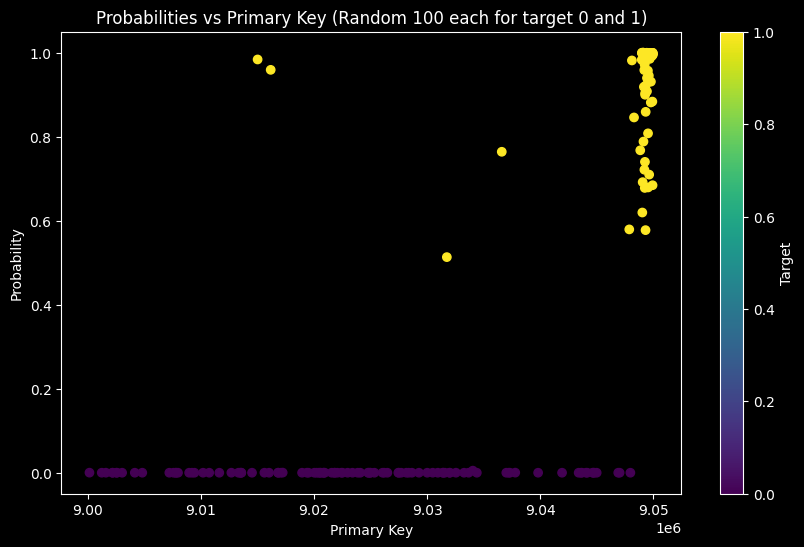

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'predictions' is your DataFrame
# Assuming 'primary key' is the name of your primary key column
# Assuming 'probability' is the name of your probability column

# Selecting random 100 rows with target value 0
random_rows_target_0 = predictions[predictions['target values'] == 0].sample(n=100, random_state=42)

# Selecting random 100 rows with target value 1
random_rows_target_1 = predictions[predictions['target values'] == 1].sample(n=100, random_state=42)

# Concatenating the selected rows
random_selected_rows = pd.concat([random_rows_target_0, random_rows_target_1])

# Set the background to black
plt.style.use('dark_background')

# Plotting scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(random_selected_rows['primary key'], random_selected_rows['probability'], c=random_selected_rows['target values'], cmap='viridis')
plt.title('Probabilities vs Primary Key (Random 100 each for target 0 and 1)')
plt.xlabel('Primary Key')
plt.ylabel('Probability')
plt.colorbar(label='Target')
plt.show()


In [ ]:
predictions.to_csv('Predictions.csv',index=False)